In [33]:
!pip install -q -U kaggle_environments

In [34]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Опишем поведение агента, всегда играющего "камень" - это значение 0

In [35]:
%%writefile rock_agent.py

#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def your_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [36]:
%%writefile copy_opponent.py

import random

#Example
def copy_opponent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_opponent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

In [37]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py", "copy_opponent.py"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes
)

[[0, 0]]

---

Опишим агентов
---

In [38]:
%%writefile agents/paper_agent.py

##   1   ###############################

def paper_agent(observation, configuration):
    """
    Всегда возвращает бумагу
    """
    return 1

Overwriting agents/paper_agent.py


In [39]:
%%writefile agents/scissors_agent.py

##   2   ###############################

def scissors_agent(observation, configuration):
    """
    Всегда возвращает ножницы
    """
    return 2

Overwriting agents/scissors_agent.py


In [40]:
%%writefile agents/cycle_agent.py

##   3   ###############################

def cycle_agent(observation, configuration):
    """ 
    Перебирает камень ножницы бумагу по порядку
    """
    return observation.step % 3

Overwriting agents/cycle_agent.py


In [41]:
%%writefile agents/random_agent.py

##   4   ###############################

import random

def random_agent(observation, configuration):
    """
    Всегда возвращает рандомное значение
    """
    return random.randint(0, 2)

Overwriting agents/random_agent.py


In [42]:
%%writefile agents/weighted_random_agent.py

##   5   ###############################

import random

def weighted_random_agent(observation, configuration):
    """ 
    Возвращает камень с вероятностью 20%, бумагу с вероятностью 50%, ножницы с вероятностью 30%
    """
    return random.choices([0, 1, 2], weights=[0.2, 0.5, 0.3])[0]

Overwriting agents/weighted_random_agent.py


In [43]:
%%writefile agents/third_step_paper_agent_other_random.py

##   6   ###############################

import random

def third_step_paper_agent_other_random(observation, configuration):
    """
    Каждый третий шаг возвращает бумагу, в остальных случаях  рандом
    """
    if observation.step % 3 == 0:
      return 1
    return random.randint(0, 2)

Overwriting agents/third_step_paper_agent_other_random.py


In [44]:
%%writefile agents/rock_paper_agent.py

##   7   ###############################

def rock_paper_agent(observation, configuration):
    """
    Каждый шаг возвращает камень, но четный шаг возвращает бумагу
    """
    if observation.step % 2 == 0:
      return 1
    return 0

Overwriting agents/rock_paper_agent.py


In [45]:
%%writefile agents/rock_scissors_agent.py

##   8   ###############################

def rock_scissors_agent(observation, configuration):
    """
    Каждый шаг возвращает камень, но четный шаг возвращает ножницы
    """
    if observation.step % 2 == 0:
      return 2
    return 0

Overwriting agents/rock_scissors_agent.py


In [46]:
%%writefile agents/cycle_agent_v2.py

##   9   ###############################

import random
def cycle_agent_v2(observation, configuration):
    """
    Перебирает ножницы камень бумагу по порядку (2-0-1-2-0-1...)
    """
    # если это первый ход
    if observation.step > 0:
        # возвращаем рандомное значение из доступных вариантов
        return (observation.last_step + 2) % configuration.signs
    # прибавляем 2 к своему последнему ходу
    return random.choice([0, 1, 2]) 

Overwriting agents/cycle_agent_v2.py


In [47]:
%%writefile agents/paper_random_five_agent.py

##   10   ##############################

import random

def paper_random_five_agent(observation, configuration):
    """
    Каждый пятый шаг возвращает рандомное значение, в остальных случаях бумагу
    """
    if observation.step % 5 == 0:
        return random.choice([0, 1, 2])
    else:
        return 1

Overwriting agents/paper_random_five_agent.py


In [48]:
%%writefile agents/anti_pattern_agent.py

##   11   ##############################

import random

def anti_pattern_agent(observation, configuration):
    """
    Этот агент предполагает, что противник повторит свой последний ход, и разыгрывает встречный ход.
    """
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % 3
    else:
        return random.choice([0, 1, 2])

Writing agents/anti_pattern_agent.py


In [49]:
%%writefile agents/pattern_recognition_agent.py

##   12   ##############################

import random

def pattern_recognition_agent(observation, configuration):
    """
    Этот агент пытается обнаружить закономерность в движениях противника и противодействовать ей.
    """
    if observation.step > 1:
        last_two_moves = (observation.lastOpponentAction, observation.lastOpponentAction)
        if last_two_moves == (0, 0):  # Соперник дважды сыграл камень
            return 1  
        elif last_two_moves == (1, 1):  # Соперник дважды сыграл бумагу
            return 2  
        elif last_two_moves == (2, 2):  # Соперник дважды сыграл ножницы
            return 0  
    return random.choice([0, 1, 2])

Overwriting agents/pattern_recognition_agent.py


In [50]:
%%writefile agents/lose_pattern_agent.py

##   13   ##############################

import random

def lose_pattern_agent(observation, configuration):
    """
    Этот агент выбирает проигрышную стратегию, всегда выбирая ход, который проиграет последнему ходу противника.
    """
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % 3
    else:
        return random.choice([0, 1, 2])

Overwriting agents/lose_pattern_agent.py


In [51]:
%%writefile agents/random_five_agent.py

##   14   ##############################

import random

def random_five_agent(observation, configuration):
    """
    Каждый пятый шаг возвращает рандомное значение, в остальных случаях играет по кругу 
    """
    if observation.step % 5 == 0:
        return random.choice([0, 1, 2])
    else:
        return (observation.step % 3) 

Overwriting agents/random_five_agent.py


In [52]:
%%writefile agents/third_step_rock_srcond_paper_agent.py

##   15   ##############################

import random

def third_step_rock_srcond_paper_agent(observation, configuration):
    """
    Каждый третий шаг возвращает камень, каждый второй бумагу
    """
    if observation.step % 3 == 0:
      return 0
    if observation.step % 2 == 0:
        return 1
    return random.randint(0, 2)

Overwriting agents/third_step_rock_srcond_paper_agent.py


----

Матчи
---

In [53]:

import pandas as pd
import numpy as np
from kaggle_environments import make, evaluate
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

# Список всех агентов
agents = [
    "anti_pattern_agent.py",
    "cycle_agent.py",
    "cycle_agent_v2.py",
    "lose_pattern_agent.py",
    "paper_agent.py",
    "paper_random_five_agent.py",
    "pattern_recognition_agent.py",
    "random_agent.py",
    "random_five_agent.py",
    "rock_paper_agent.py",
    "rock_scissors_agent.py",
    "scissors_agent.py",
    "third_step_paper_agent_other_random.py",
    "third_step_rock_srcond_paper_agent.py",
    "weighted_random_agent.py"
]

# Создаем пустой DataFrame для хранения результатов
results_df = pd.DataFrame(index=agents, columns=agents)
results_df = results_df.fillna(0)

# Количество игр между каждой парой агентов
n_games = 1000

# Проводим турнир
for agent1, agent2 in combinations(agents, 2):
    try:
        #  Проводим серию игр
        scores = evaluate(
            "rps",
            [f"agents/{agent1}", f"agents/{agent2}"],
            configuration={"episodeSteps": n_games}
        )
    

        # Подсчитываем победы
        agent1_wins = sum(1 for score in scores if score[0] > score[1])
        agent2_wins = sum(1 for score in scores if score[1] > score[0])
    
        # Записываем результаты в DataFrame
        results_df.at[agent1, agent2] = agent1_wins
        results_df.at[agent2, agent1] = agent2_wins

        
    except Exception as e:
        print(f"Error in match {agent1} vs {agent2}: {str(e)}")
        results_df.at[agent1, agent2] = 0
        results_df.at[agent2, agent1] = 0

# Сохраняем результаты в CSV
results_df.to_csv('tournament_results.csv')

/tmp/ipykernel_294687/4076384989.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df = results_df.fillna(0)


Error in match anti_pattern_agent.py vs cycle_agent_v2.py: '>' not supported between instances of 'int' and 'NoneType'
Error in match cycle_agent.py vs cycle_agent_v2.py: '>' not supported between instances of 'int' and 'NoneType'
Error in match cycle_agent_v2.py vs lose_pattern_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs paper_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs paper_random_five_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs pattern_recognition_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs random_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs random_five_agent.py: '>' not supported between instances of 'NoneType' and 'int'
Error in match cycle_agent_v2.py vs rock_paper_agent.py: 

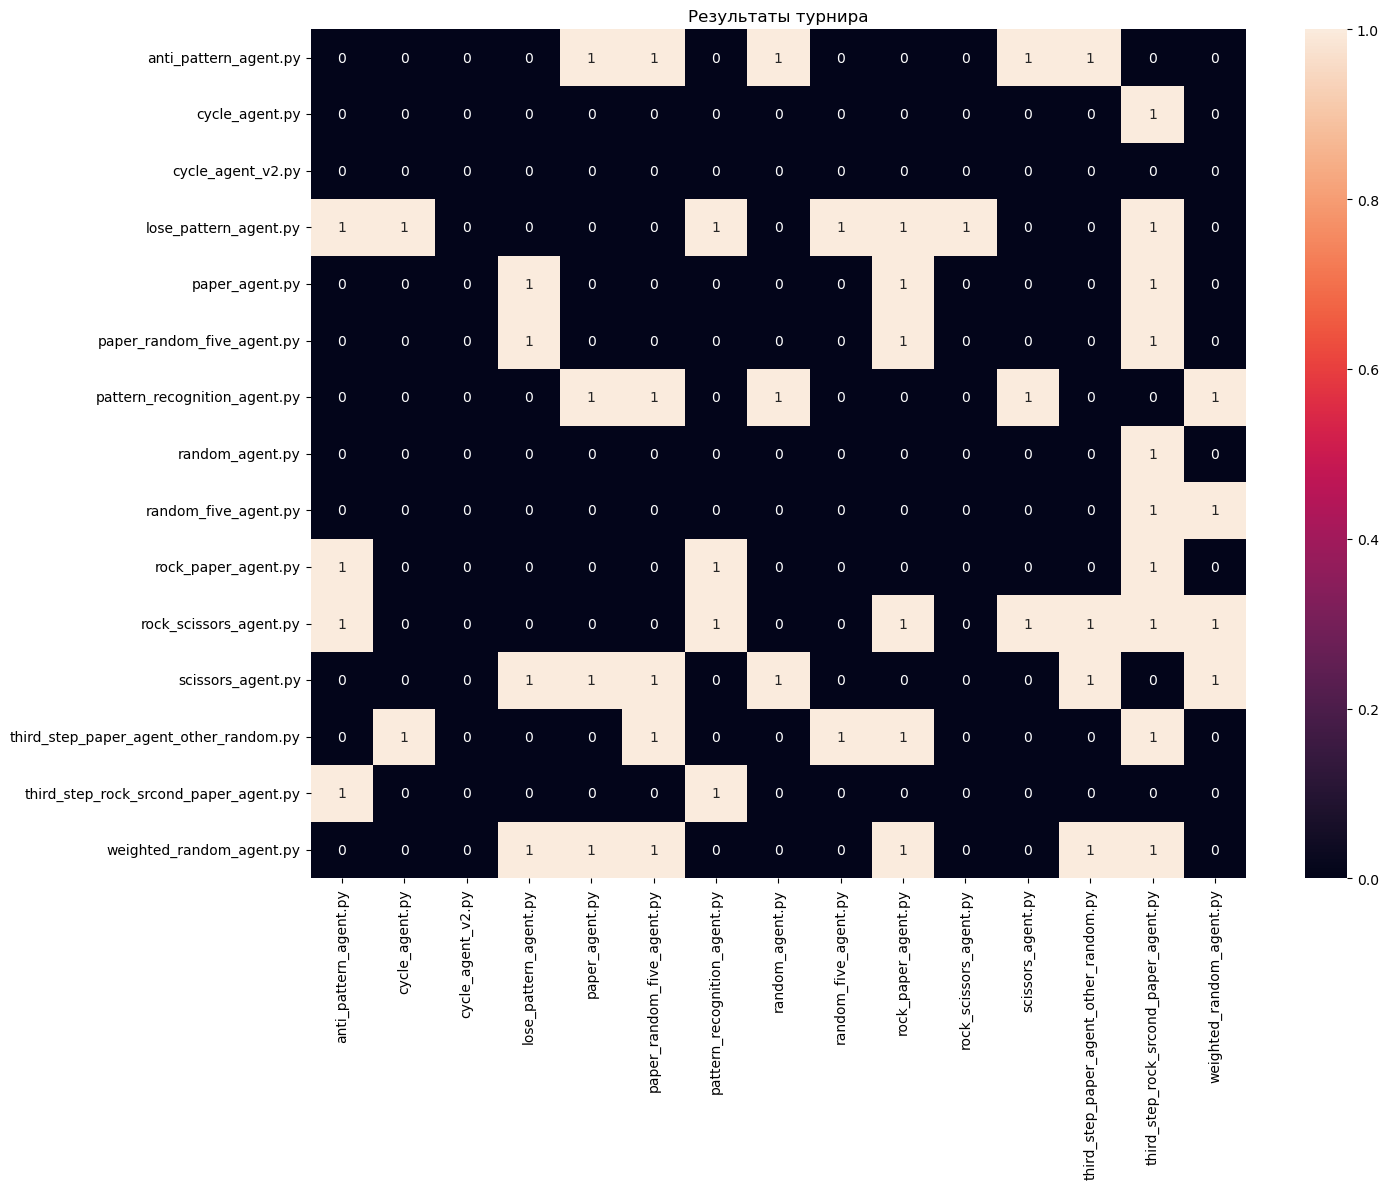

In [ ]:
# Создаем тепловую карту результатов
plt.figure(figsize=(15, 12))
sns.heatmap(results_df, annot=True)
plt.title('Результаты турнира')
plt.tight_layout()
# Сохраняем тепловую карту
plt.savefig('tournament_heatmap.png')